In [5]:
import os
print(os.environ["PYTHONPATH"])  # Should contain parent dirrectory of image_captioning module

/home/k/retail


In [6]:
import json

import pandas as pd
import numpy as np
import editdistance
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import torch

import image_captioning.constants as C
from image_captioning.caption import caption_image_beam_search, visualize_att

In [7]:
with open("metrics.json") as f:
    metrics = json.load(f)
train_metrics = pd.DataFrame(metrics["train"])
train_metrics.columns = ["train_" + c for c in train_metrics.columns]
val_metrics = pd.DataFrame(metrics["val"])
val_metrics.columns = ["val_" + c for c in val_metrics.columns]
metrics = train_metrics.join(val_metrics)
metrics.head()

,train_error,train_losses,val_edit,val_error,val_losses,val_norm_edit
0,0.627792,2.881430,1.870990,0.525350,2.554696,0.520882
1,0.464582,2.354946,1.336870,0.375297,2.089510,0.368438
2,0.339504,1.985418,1.017654,0.285432,1.835459,0.279853
3,0.248413,1.736742,0.732388,0.205531,1.610882,0.201654
4,0.186843,1.561845,0.578170,0.162632,1.482801,0.158041


Text(0.5,0,'Epoch')

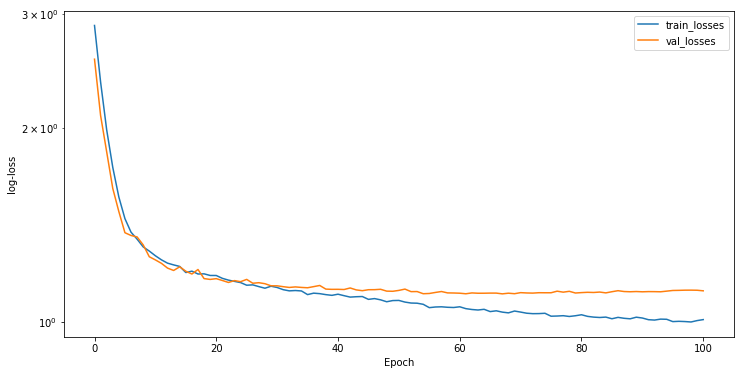

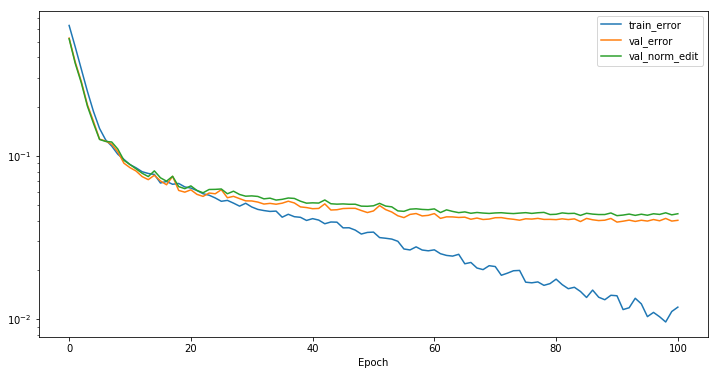

In [11]:
metrics[["train_losses", "val_losses"]].plot(figsize=(12,6))
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("log-loss")
metrics[["train_error", "val_error", "val_norm_edit"]].plot(figsize=(12,6))
plt.yscale("log")
plt.xlabel("Epoch")